In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk


In [4]:
# Load datasets
Fake_news = pd.read_csv('Fake.csv')
Real_news = pd.read_csv('True.csv') 

In [5]:
# Shape of datasets
Fake_news.shape, Real_news.shape

((23481, 4), (21417, 4))

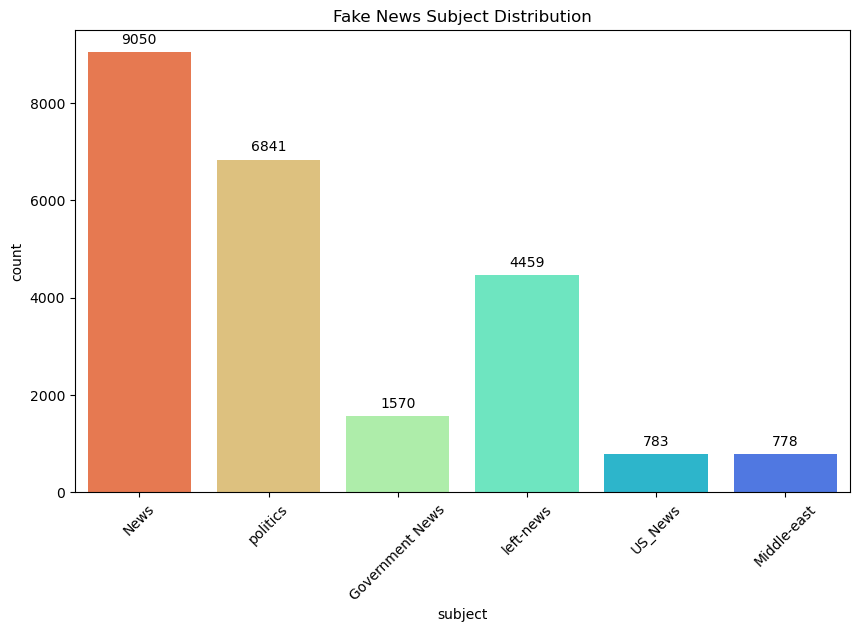

In [98]:
# Subject distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=Fake_news, x='subject', palette ='rainbow_r', hue='subject' )
plt.title('Fake News Subject Distribution')
plt.xticks(rotation=45)

# Adding exact numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

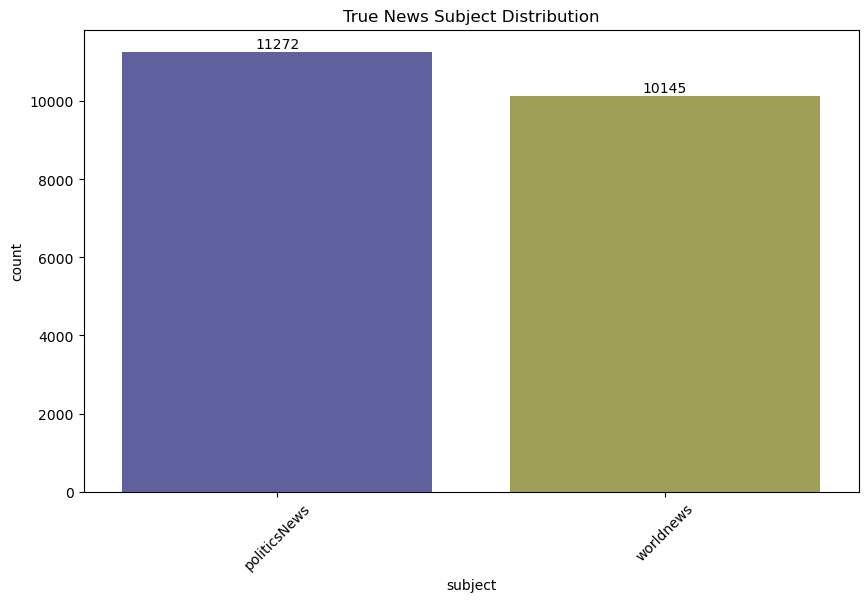

In [99]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=Real_news, x='subject', palette ='gist_stern', hue='subject' )
plt.title('True News Subject Distribution')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')


In [6]:
# Classify the news
Fake_news['class']= 0
Real_news['class']=1

In [7]:
# Join the datasets together
FR = pd.concat([Fake_news, Real_news])

In [8]:
# Dataset columns
FR.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [9]:
# Drop irrelevant columns
fr = FR.drop(columns=['title', 'subject', 'date'], axis=0)

In [10]:
# Relevant columns
fr.columns

Index(['text', 'class'], dtype='object')

In [11]:
# List of dataset
fr.head(5)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [12]:

# Sample dataset
fr = fr.sample(frac = 1)

In [13]:
fr.reset_index(drop=True, inplace=True)


In [14]:
# List dataset
fr.head()

,text,class
0,(Reuters) - The New York State on Wednesday co...,1
1,KABUL (Reuters) - (This version of the July 23...,1
2,MEXICO CITY (Reuters) - U.S. Secretary of Stat...,1
3,(Reuters) - U.S. oil and gas executives bet bi...,1
4,The former Fox News contributor and editor of ...,0


In [15]:
# Count of news group by class
cc = fr.groupby('class').count()
print(cc)

        text
class       
0      23481
1      21417


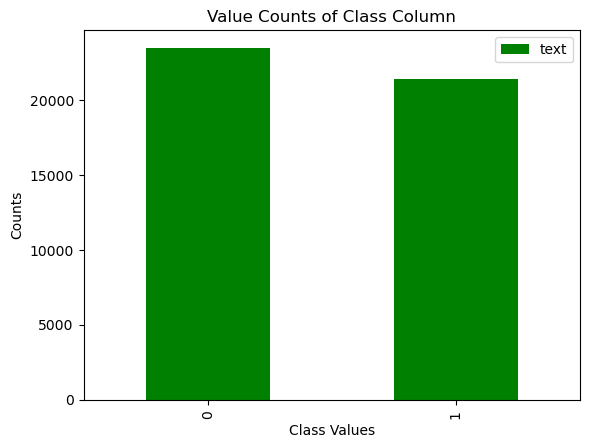

In [125]:
# Count of news Visualization
cc.plot(kind='bar',color='Green')
plt.title('Value Counts of Class Column')
plt.xlabel('Class Values')
plt.ylabel('Counts')
plt.show()

### WORD FREQUENCY

In [16]:
# Combine all text for fake and real news
fake_news = fr[fr['class'] == 0]['text'].str.cat(sep=' ')
real_news = fr[fr['class'] == 1]['text'].str.cat(sep=' ')



In [17]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
fake_words = [word for word in fake_news.split() if word.lower() not in stop_words]
real_words = [word for word in real_news.split() if word.lower() not in stop_words]

In [18]:


from wordcloud import WordCloud



In [19]:

# Generate word clouds
fake_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(' '.join(fake_words))
real_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(' '.join(real_words))

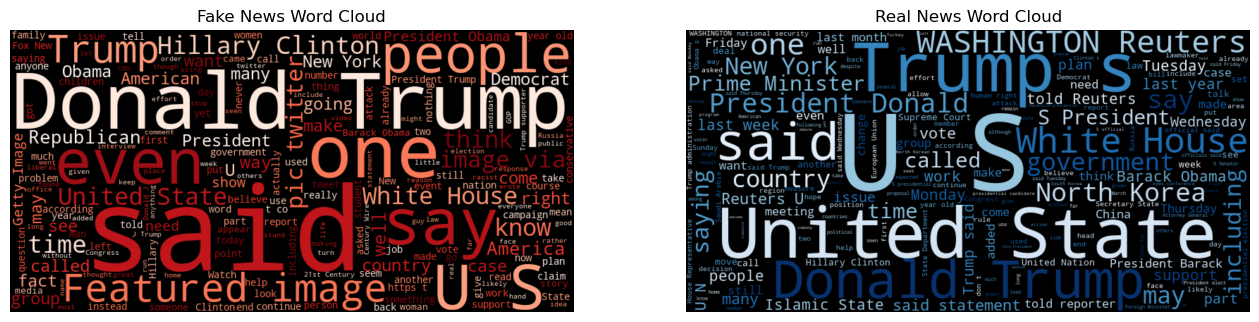

In [20]:
# Plot word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Fake News Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Real News Word Cloud')
plt.axis('off')

plt.show()


In [21]:
from collections import Counter

In [22]:
# Count word frequencies
fake_word_freq = Counter(fake_words)
real_word_freq = Counter(real_words)

In [23]:
# Convert to DataFrame for easier plotting
fake_word_freq_df = pd.DataFrame(fake_word_freq.most_common(20), columns=['Word', 'Frequency'])
real_word_freq_df = pd.DataFrame(real_word_freq.most_common(20), columns=['Word', 'Frequency'])

In [24]:
# List of fake_word_freq
fake_word_freq_df.head(10)

,Word,Frequency
0,Trump,64844
1,would,23024
2,people,21266
3,said,21112
4,one,19037
5,Donald,16751
6,like,16314
7,Obama,15925
8,Clinton,15528
9,President,15191


In [25]:
# List of real_word_freq
real_word_freq_df.head(10)

,Word,Frequency
0,said,72025
1,U.S.,38271
2,Trump,36461
3,would,31330
4,-,31059
5,said.,21582
6,(Reuters),21239
7,President,17112
8,also,15703
9,United,15030


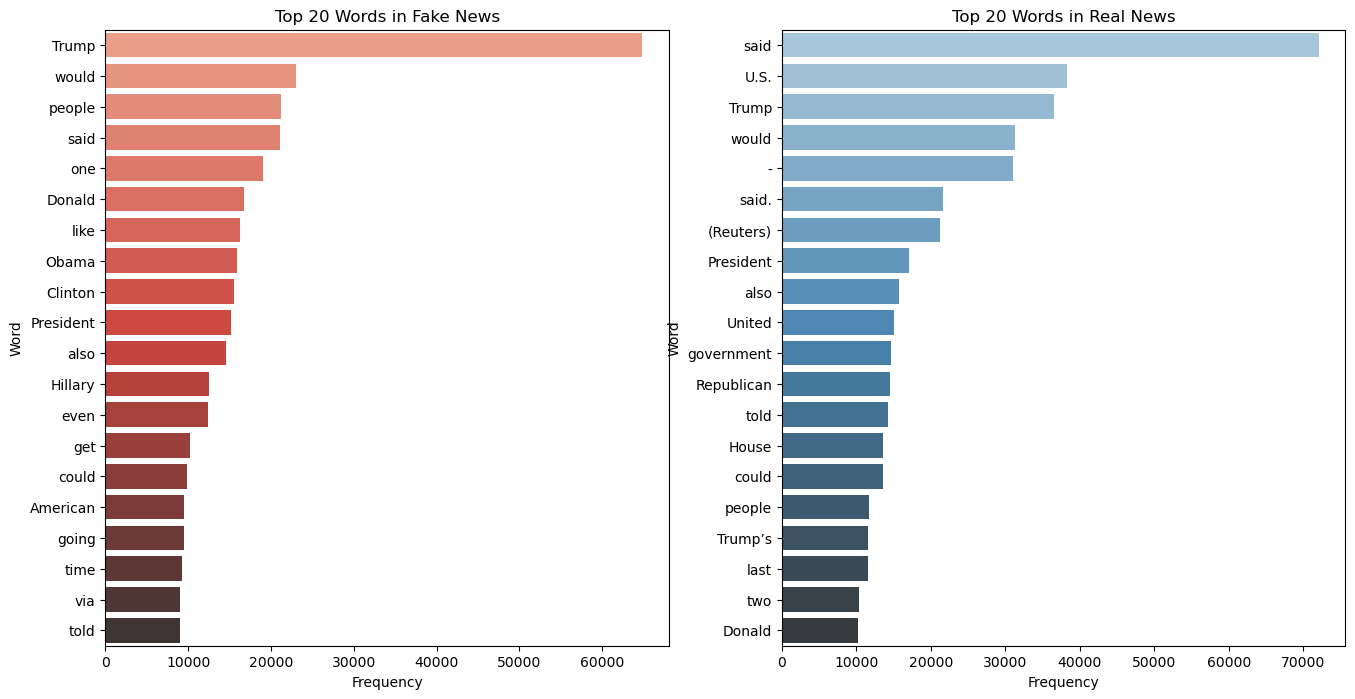

In [71]:
# Plot word frequencies
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Word', data=fake_word_freq_df, hue='Word', palette='Reds_d', legend=False)
plt.title('Top 20 Words in Fake News')

plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Word', data=real_word_freq_df, hue='Word', palette='Blues_d', legend=False)
plt.title('Top 20 Words in Real News')

plt.show()

### TEXT LENGTH

In [24]:
# Preprocess the text 
fr['text'] = fr['text'].str.replace(r'[^\w\s]', '').str.lower()



In [25]:
# Calculate word counts
fr['word_count'] = fr['text'].apply(lambda x: len(x.split()))

In [26]:
fr.head(3)

,text,class,word_count
0,donald trump just couldn t wish all americans ...,0,495
1,house intelligence committee chairman devin nu...,0,305
2,"on friday, it was revealed that former milwauk...",0,580


In [27]:
# Group by class and calculate average word counts
average_word_counts = fr.groupby('class')['word_count'].mean()

print(average_word_counts)

class
0    423.197905
1    385.640099
Name: word_count, dtype: float64


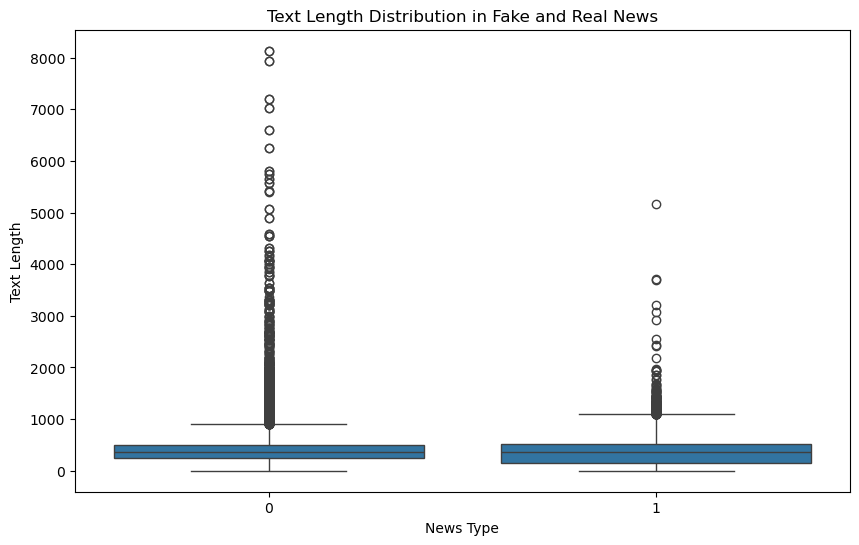

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='word_count', data=fr)
plt.title('Text Length Distribution in Fake and Real News')
plt.xlabel('News Type')
plt.ylabel('Text Length')
plt.show()


### NAME ENTITIES

In [1]:
import spacy

if spacy:
    print("spacy is installed!")


spacy is installed!


In [32]:
import pdb  # for command-line debugger


In [2]:
# Load spacy model
nlp = spacy.load('en_core_web_sm')


In [3]:
doc = nlp("Hello, world!")
print([(token.text, token.pos_) for token in doc])


[('Hello', 'PROPN'), (',', 'PUNCT'), ('world', 'NOUN'), ('!', 'PUNCT')]


In [4]:
import pandas as pd

In [6]:
#Load the dataset
Fn = pd.read_csv('Fake.csv')
Rn = pd.read_csv('True.csv') 

In [7]:
#Function to perform NER
def extract_entities(text, nlp_obj):  # Function accepts nlp_obj as an argument
    doc = nlp_obj(text)
    return [(ent.text, ent.label_) for ent in doc.ents]


In [8]:
# Apply NER on fake news
Fn['entities'] = Fn['text'].apply(extract_entities, args=(nlp,))

In [12]:
# Display fake news results
Fn[['text', 'entities']].head()

,text,entities
0,Donald Trump just couldn t wish all Americans ...,"[(Donald Trump, PERSON), (Americans, NORP), (N..."
1,House Intelligence Committee Chairman Devin Nu...,"[(House Intelligence Committee, ORG), (Devin N..."
2,"On Friday, it was revealed that former Milwauk...","[(Friday, DATE), (Milwaukee Sheriff, PERSON), ..."
3,"On Christmas day, Donald Trump announced that ...","[(Christmas day, DATE), (Donald Trump, PERSON)..."
4,Pope Francis used his annual Christmas Day mes...,"[(Francis, PERSON), (annual, DATE), (Christmas..."


In [10]:
grouped_data_Fn = Fn.groupby("date")  # Group by date


In [11]:
entity_counts_Fn = grouped_data_Fn["entities"].apply(lambda x: len(x))  # Count entities in each group
entity_counts_Fn.head()

date
14-Feb-18    1
15-Feb-18    9
16-Feb-18    8
17-Feb-18    7
18-Feb-18    7
Name: entities, dtype: int64

In [13]:
# Apply NER on real news dataset
Rn['entities'] = Rn['text'].apply(extract_entities, args=(nlp,))

In [27]:
# Display real news results
Rn[['text', 'entities']].head(5)

,text,entities
0,WASHINGTON (Reuters) - The head of a conservat...,"[(WASHINGTON, GPE), (Reuters, ORG), (Republica..."
1,WASHINGTON (Reuters) - Transgender people will...,"[(WASHINGTON, GPE), (Reuters, ORG), (first, OR..."
2,WASHINGTON (Reuters) - The special counsel inv...,"[(WASHINGTON, GPE), (Reuters, ORG), (Russia, G..."
3,WASHINGTON (Reuters) - Trump campaign adviser ...,"[(WASHINGTON, GPE), (Reuters, ORG), (George Pa..."
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,"[(SEATTLE, GPE), (Reuters, ORG), (Donald Trump..."


In [14]:
grouped_data_Rn = Rn.groupby("date")  # Group by date


In [22]:
entity_counts_Rn = grouped_data_Rn["entities"].apply(lambda x: len(x))  # Count entities in each group
entity_counts_Rn.head()

date
April 1, 2016      14
April 1, 2017       2
April 10, 2016      3
April 10, 2017     15
April 11, 2016     13
Name: entities, dtype: int64

### ENTITY FREQUENCY COUNT

In [21]:
from collections import Counter


In [22]:
# Extract entities from fake and real news
fake_entities = [ent for sublist in Fn['entities'] for ent in sublist]
real_entities = [ent for sublist in Rn['entities'] for ent in sublist]



In [23]:
# Count the frequency of each entity
fake_entity_counts = Counter(fake_entities)
real_entity_counts = Counter(real_entities)


In [24]:
# Display the most common entities in fake and real news
print("Most common entities in fake news:", fake_entity_counts.most_common(20))


Most common entities in fake news: [(('Trump', 'ORG'), 46714), (('Donald Trump', 'PERSON'), 13243), (('one', 'CARDINAL'), 9556), (('America', 'GPE'), 8838), (('Clinton', 'PERSON'), 8801), (('American', 'NORP'), 8046), (('Obama', 'PERSON'), 7679), (('Republicans', 'NORP'), 7279), (('Republican', 'NORP'), 7259), (('Trump', 'PERSON'), 7152), (('Hillary Clinton', 'PERSON'), 7114), (('first', 'ORDINAL'), 7108), (('U.S.', 'GPE'), 6627), (('US', 'GPE'), 6242), (('Hillary', 'PERSON'), 6102), (('two', 'CARDINAL'), 5922), (('Americans', 'NORP'), 5892), (('Russia', 'GPE'), 5699), (('FBI', 'ORG'), 5472), (('the United States', 'GPE'), 5376)]


In [25]:
print("Most common entities in real news:", real_entity_counts.most_common(20))


Most common entities in real news: [(('Trump', 'ORG'), 38005), (('U.S.', 'GPE'), 31489), (('Reuters', 'ORG'), 28541), (('Republican', 'NORP'), 14956), (('the United States', 'GPE'), 10506), (('Donald Trump', 'PERSON'), 9626), (('Tuesday', 'DATE'), 7989), (('China', 'GPE'), 7967), (('Russia', 'GPE'), 7923), (('two', 'CARDINAL'), 7919), (('Wednesday', 'DATE'), 7747), (('Thursday', 'DATE'), 7503), (('first', 'ORDINAL'), 7089), (('Friday', 'DATE'), 7048), (('WASHINGTON', 'GPE'), 6853), (('Senate', 'ORG'), 6816), (('Monday', 'DATE'), 6797), (('Republicans', 'NORP'), 6724), (('Clinton', 'PERSON'), 6395), (('one', 'CARDINAL'), 6196)]


In [26]:
entity_types = ['Person', 'Organization', 'Location', 'Date']


In [27]:
# Convert Counter to DataFrame
fake_df = pd.DataFrame(fake_entity_counts.items(), columns=['Entity', 'Count'])
real_df = pd.DataFrame(real_entity_counts.items(), columns=['Entity', 'Count'])


In [28]:
fake_df.head()

,Entity,Count
0,"(Donald Trump, PERSON)",13243
1,"(Americans, NORP)",5892
2,"(New Year, EVENT)",46
3,"(one, CARDINAL)",9556
4,"(Fake News Media, WORK_OF_ART)",5


In [29]:
 real_df.head()

,Entity,Count
0,"(WASHINGTON, GPE)",6853
1,"(Reuters, ORG)",28541
2,"(Republican, NORP)",14956
3,"(the U.S. Congress, ORG)",344
4,"(this month, DATE)",729


In [12]:
import matplotlib.pyplot as plt

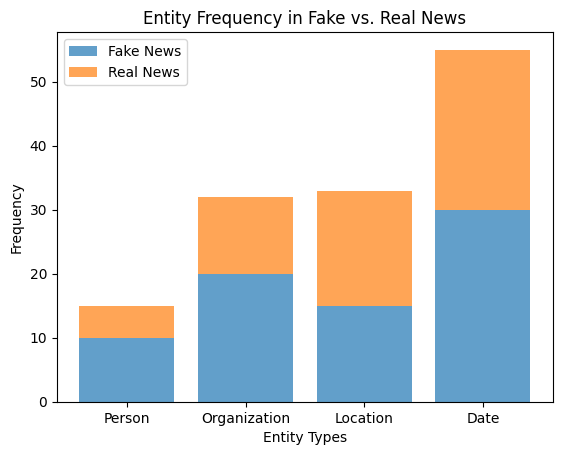

In [34]:
# Create a bar plot
x = range(len(entity_types))
plt.bar(x, fake_entity_counts, label='Fake News', alpha=0.7)
plt.bar(x, real_entity_counts, label='Real News', alpha=0.7, bottom=fake_entity_counts)

# Customize the plot
plt.xlabel('Entity Types')
plt.ylabel('Frequency')
plt.title('Entity Frequency in Fake vs. Real News')
plt.xticks(x, entity_types)  # Set x-axis labels
plt.legend()
plt.show()


### SENTIMENT ANALYSIS

In [2]:
from textblob import TextBlob



In [70]:
# Function to perform sentiment analysis
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [71]:
# Apply sentiment analysis to dataset
Fn['sentiment'] = Fn['text'].apply(get_sentiment)


In [78]:
# Display Fake results
Fn[['text', 'sentiment']].head()


,text,sentiment
0,Donald Trump just couldn t wish all Americans ...,0.082132
1,House Intelligence Committee Chairman Devin Nu...,-0.005004
2,"On Friday, it was revealed that former Milwauk...",-0.012345
3,"On Christmas day, Donald Trump announced that ...",-0.023118
4,Pope Francis used his annual Christmas Day mes...,-0.011722


In [76]:
# Apply sentiment analysis to your dataset
Rn['sentiment'] = Rn['text'].apply(get_sentiment)


In [79]:
# Display the results
Rn[['text', 'sentiment']].head()


,text,sentiment
0,WASHINGTON (Reuters) - The head of a conservat...,0.037083
1,WASHINGTON (Reuters) - Transgender people will...,0.055880
2,WASHINGTON (Reuters) - The special counsel inv...,0.115930
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0.035968
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0.030093


In [80]:
# Categorize sentiment
Fn['sentiment_category'] = pd.cut(Fn['sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])
Rn['sentiment_category'] = pd.cut(Rn['sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])


In [82]:
# Display the results
Fn[['text', 'sentiment', 'sentiment_category']].head()

,text,sentiment,sentiment_category
0,Donald Trump just couldn t wish all Americans ...,0.082132,Neutral
1,House Intelligence Committee Chairman Devin Nu...,-0.005004,Neutral
2,"On Friday, it was revealed that former Milwauk...",-0.012345,Neutral
3,"On Christmas day, Donald Trump announced that ...",-0.023118,Neutral
4,Pope Francis used his annual Christmas Day mes...,-0.011722,Neutral


In [83]:
# Display the results
Rn[['text', 'sentiment', 'sentiment_category']].head()

,text,sentiment,sentiment_category
0,WASHINGTON (Reuters) - The head of a conservat...,0.037083,Neutral
1,WASHINGTON (Reuters) - Transgender people will...,0.055880,Neutral
2,WASHINGTON (Reuters) - The special counsel inv...,0.115930,Positive
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0.035968,Neutral
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0.030093,Neutral


In [85]:
# Count the number of each sentiment category
sentiment_counts_fn = Fn['sentiment_category'].value_counts()
sentiment_counts_rn = Rn['sentiment_category'].value_counts()


In [89]:
# Convert Counter to DataFrame
sf = pd.DataFrame(sentiment_counts_fn.items(), columns=['Sentiment', 'Count'])
sr = pd.DataFrame(sentiment_counts_rn.items(), columns=['Sentiment', 'Count'])

In [90]:
sf.head()

,Sentiment,Count
0,Neutral,15166
1,Positive,7150
2,Negative,1151


In [92]:
sr.head()

,Sentiment,Count
0,Neutral,15228
1,Positive,5371
2,Negative,818


In [93]:
# Merge fake and real sentiment
fr_s = pd.merge(sf, sr, on='Sentiment', how='outer', suffixes=('_Fake', '_Real')).fillna(0)

In [94]:
fr_s.head()

,Sentiment,Count_Fake,Count_Real
0,Negative,1151,818
1,Neutral,15166,15228
2,Positive,7150,5371


### PIE PLOT

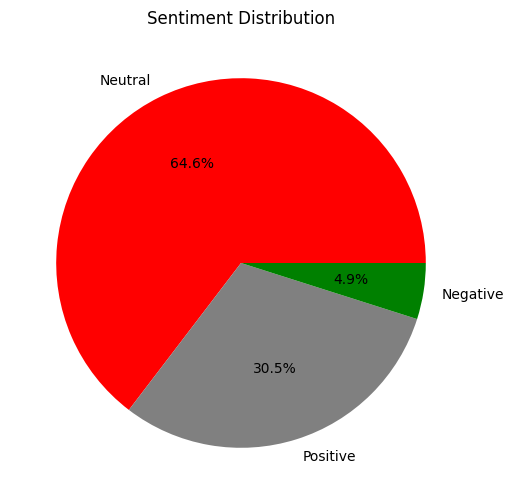

In [101]:
# Plot Fake sentiment pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts_fn, labels=sentiment_counts_fn.index, autopct='%1.1f%%', colors=['red', 'grey', 'green'])
plt.title('Sentiment Distribution')
plt.show()


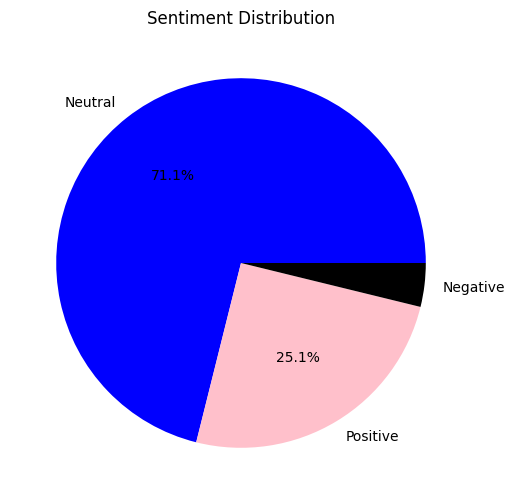

In [102]:
# Plot real sentiment pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts_rn, labels=sentiment_counts_rn.index, autopct='%1.1f%%', colors=['blue', 'pink', 'black'])
plt.title('Sentiment Distribution')
plt.show()


### LINE PLOT

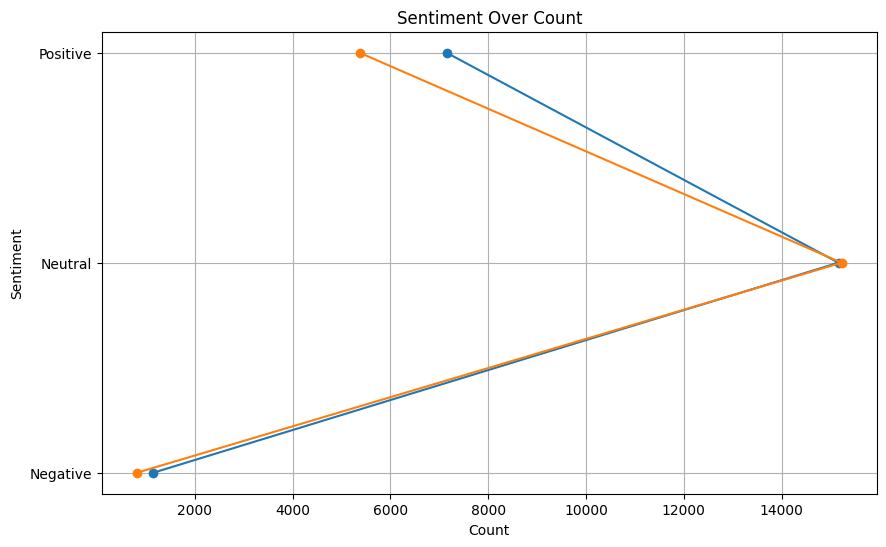

In [107]:
# Plot Fake & Real line chart
plt.figure(figsize=(10, 6))
plt.plot(fr_s[['Count_Fake', 'Count_Real']], fr_s['Sentiment'], marker='o')
plt.title('Sentiment Over Count')
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.grid(True)
plt.show()


### SENTIMENT DISTRIBUTION PLOT

In [111]:
%pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\user\Virtual environment\pandas_venv\scripts\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/294.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00


In [5]:
import seaborn as sns


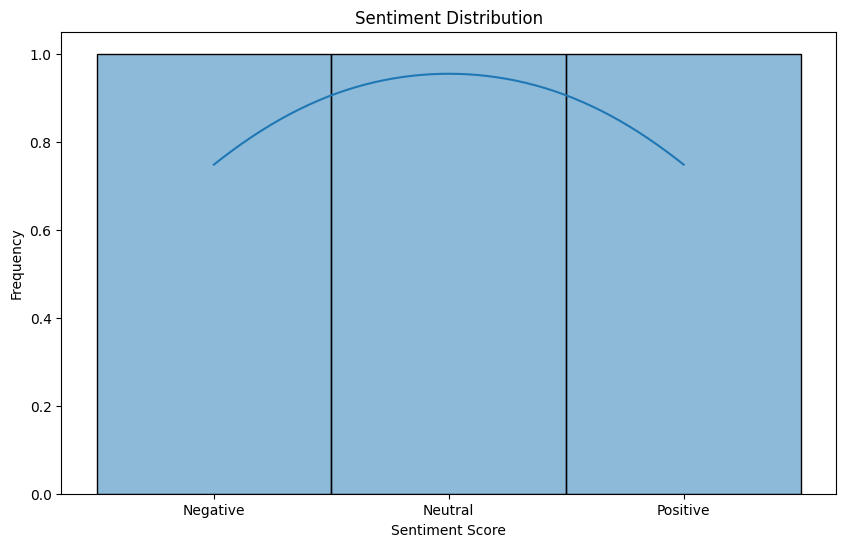

In [118]:
# Plot Fake & Real sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(fr_s['Sentiment'], bins=10, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


### FEATURE ENGINEERING

In [16]:
#preprocessing using NLTK
stop_words = set(stopwords.words('english'))


#Tokenization, stopword removal $ stemming
def preprocess_text(text):
    token = word_tokenize(text)
    filtered_token = [word for word in token if word.lower() not in stop_words]
    lemmatizer = nltk.WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word) for word in filtered_token]
    preprocessed_text = ' '.join(lemma)
    return preprocessed_text
    

In [17]:
fr['text_cleaned'] = fr['text'].apply(preprocess_text)

In [31]:
fr.head(5)

,text,class,word_count,text_cleaned
0,donald trump just couldn t wish all americans ...,0,495,donald trump wish american happy new year leav...
1,house intelligence committee chairman devin nu...,0,305,house intelligence committee chairman devin nu...
2,"on friday, it was revealed that former milwauk...",0,580,"friday , revealed former milwaukee sheriff dav..."
3,"on christmas day, donald trump announced that ...",0,444,"christmas day , donald trump announced would b..."
4,pope francis used his annual christmas day mes...,0,420,pope francis used annual christmas day message...


In [18]:
# Separate features and target
X = fr['text_cleaned']
y = fr['class']


### VECTORIZATION (TF- IDF)

In [19]:
# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)


In [20]:
from sklearn.decomposition import PCA


In [91]:
# Apply PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_tfidf.toarray())


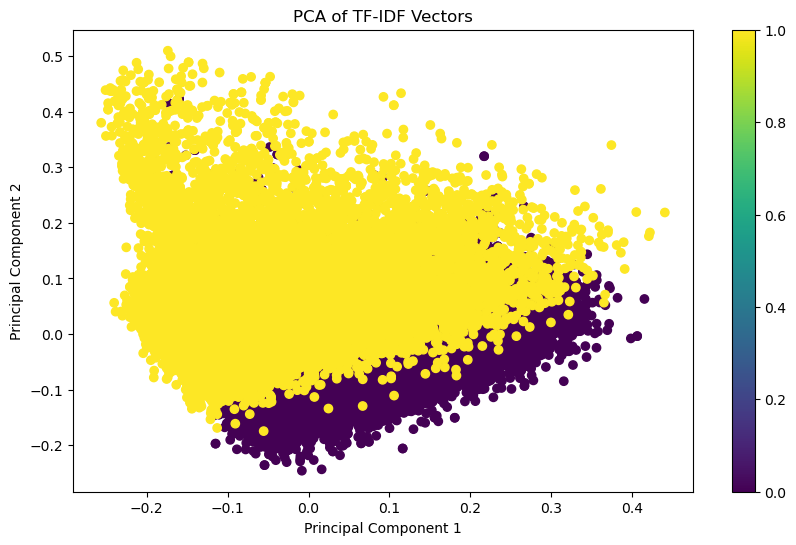

In [129]:
# Plot the PCA result
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter)
plt.title('PCA of TF-IDF Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [94]:
from sklearn.manifold import TSNE

In [95]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(X_tfidf.toarray())

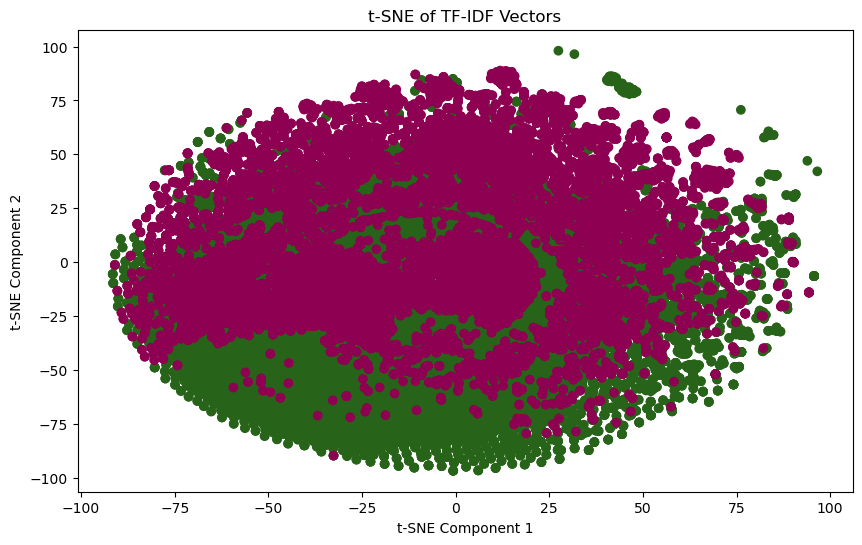

In [131]:
# Plot the t-SNE result
plt.figure(figsize=(10, 6))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y, cmap='PiYG_r')
plt.title('t-SNE of TF-IDF Vectors')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


### SPLIT DATA FOR TRAINING AND TESTING

In [21]:


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)


In [133]:
y_train_fr = pd.DataFrame(y_train, columns=['class'])


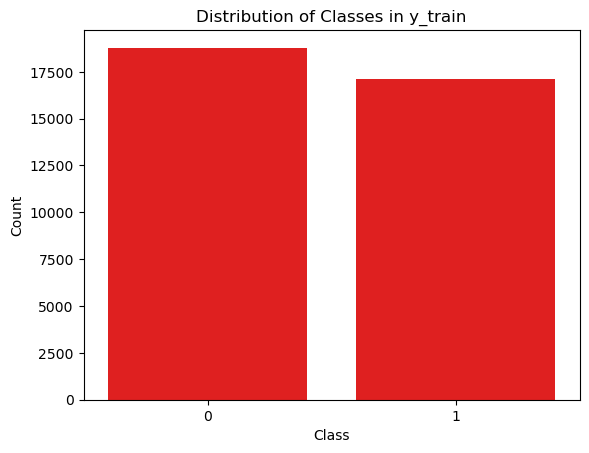

In [135]:

# Plot the distribution of classes
sns.countplot(x='class', data=y_train_fr, color='Red')
plt.title('Distribution of Classes in y_train')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### SMOTE
Balance the training data

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
smote = SMOTE(random_state = 42, k_neighbors=5)

In [24]:
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [25]:
y_train_res_fr = pd.DataFrame(y_train_res, columns = ['class'])

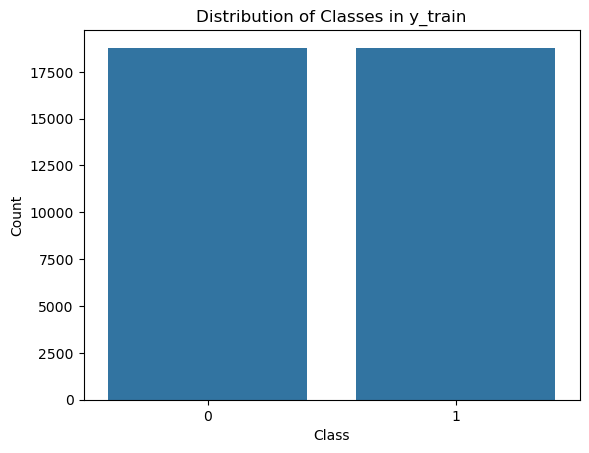

In [41]:
# Plot the distribution of classes
sns.countplot(x='class', data=y_train_res_fr)
plt.title('Distribution of Classes in y_train')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### TRAIN AND TEST THE DATA

In [81]:
lr = LogisticRegression()

In [82]:
lr.fit(X_train_res, y_train_res)

LogisticRegression()

In [83]:
print('The accuracy score of lr is:', lr.score(X_test, y_test))

The accuracy score of lr is: 0.9922048997772829


In [84]:
pred_lr = lr.predict(X_test)
print(pred_lr)

[1 1 0 ... 1 1 0]


In [85]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [86]:
report_dict = classification_report(y_test, pred_lr, output_dict=True)


In [87]:
# Select only the desired columns and rows from the dictionary
data = []
for key, values in report_dict.items():
  if key in ["precision", "recall", "f1-score", "support"]:  # Select relevant keys
    data.append([key] + values[:-1])  # Exclude the last element (support)



In [92]:
# Create the DataFrame with appropriate column names 
report_df = pd.DataFrame(data, columns=["", "Precision", "Recall", "F1-score"])


In [93]:
# Generate the classification report
report = classification_report(y_test, pred_lr, output_dict=True)


In [94]:
# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()


In [95]:
# Ensure the data is numeric
report_df = report_df.apply(pd.to_numeric, errors='coerce')


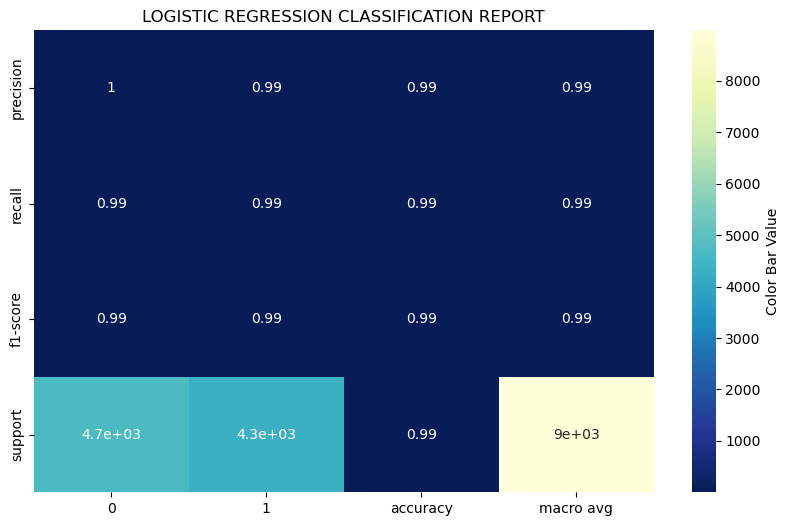

In [98]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='YlGnBu_r', cbar_kws={'label':'Color Bar Value'})
plt.title('LOGISTIC REGRESSION CLASSIFICATION REPORT')
plt.show()


In [34]:
print(confusion_matrix(pred_lr, y_test))

[[4642   24]
 [  54 4260]]


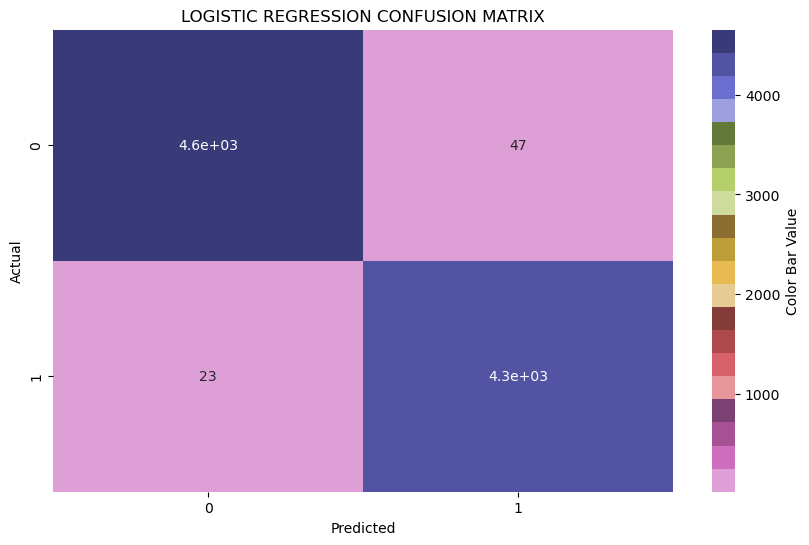

In [97]:
cml = confusion_matrix(y_test, pred_lr)
plt.figure(figsize = (10,6))
sns.heatmap(cml, cmap = 'tab20b_r', annot = True, cbar_kws={'label':'Color Bar Value'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LOGISTIC REGRESSION CONFUSION MATRIX')
plt.show()

In [26]:
from sklearn.svm import SVC


In [27]:
sv = SVC()

In [28]:
sv.fit(X_train_res, y_train_res)

SVC()

In [29]:
print('The accuracy score of svm is:', sv.score(X_test, y_test))

The accuracy score of svm is: 0.9959910913140312


In [30]:
pred_sv = sv.predict(X_test)

In [41]:
print(classification_report(pred_sv, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4687
           1       1.00      0.99      1.00      4293

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [32]:
# Generate the classification report
report_dict_sv = classification_report(y_test, pred_sv, output_dict=True)


In [34]:
# Select only the desired columns and rows from the dictionary
data_sv = []
for key, values in report_dict_sv.items():
  if key in ["precision", "recall", "f1-score", "support"]:  # Select relevant keys
    data.append([key] + values[:-1])  # Exclude the last element (support)


In [35]:
# Create the DataFrame with appropriate column names 
report_df_sv = pd.DataFrame(data_sv, columns=["", "Precision", "Recall", "F1-score"])


In [44]:
# Generate the classification report
report_sv = classification_report(y_test, pred_sv, output_dict=True)


In [45]:
# Convert the classification report to a DataFrame
report_df_sv = pd.DataFrame(report_sv).transpose()

In [46]:
# Ensure the data is numeric
report_df_sv = report_df_sv.apply(pd.to_numeric, errors='coerce')


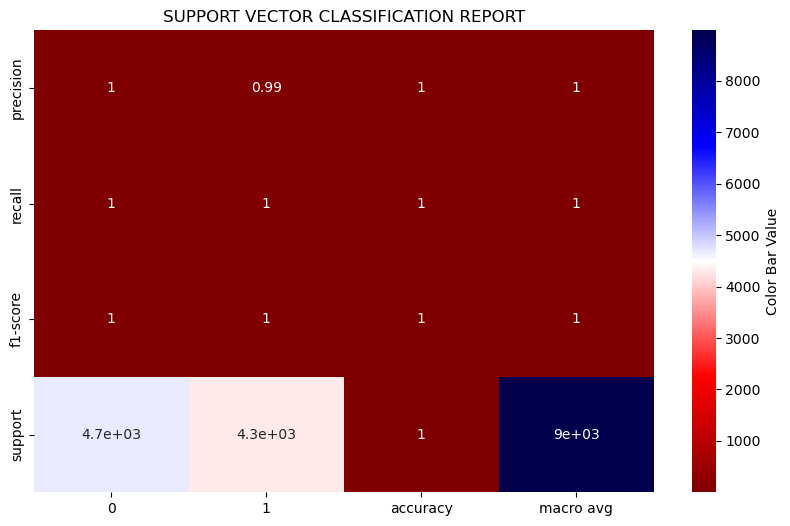

In [99]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_sv.iloc[:-1, :].T, annot=True, cmap='seismic_r', cbar_kws={'label':'Color Bar Value'})
plt.title('SUPPORT VECTOR CLASSIFICATION REPORT')
plt.show()

In [42]:
print(confusion_matrix(pred_sv, y_test))

[[4672   15]
 [  24 4269]]


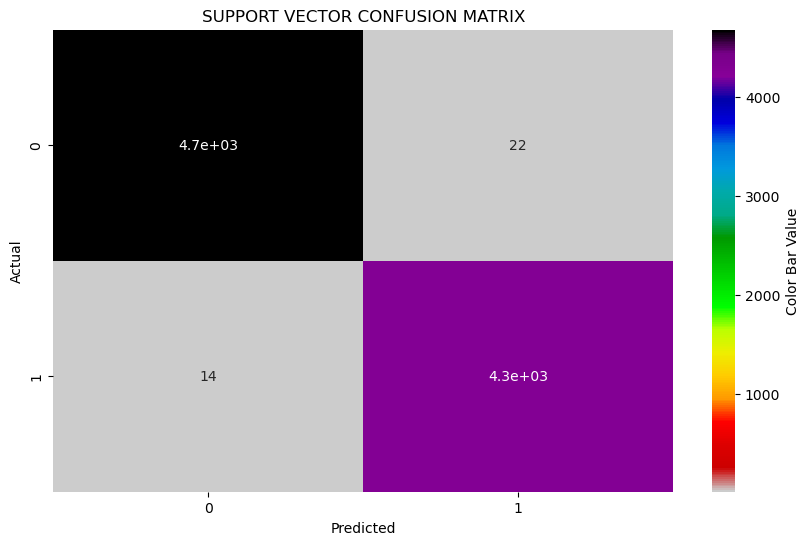

In [73]:
cms = confusion_matrix(y_test, pred_sv)
plt.figure(figsize = (10,6))
sns.heatmap(cms, cmap = 'nipy_spectral_r', annot = True, cbar_kws={'label':'Color Bar Value'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SUPPORT VECTOR CONFUSION MATRIX')
plt.show()

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [55]:
print('The accuracy score of rf is:', rf.score(X_test, y_test))


The accuracy score of rf is: 0.9989977728285078


In [56]:
pred_rf = rf.predict(X_test)

In [57]:
print(classification_report(pred_rf, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4697
           1       1.00      1.00      1.00      4283

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [62]:
# Generate the classification report
report_dict_rf = classification_report(y_test, pred_rf, output_dict=True)


In [63]:
# Select only the desired columns and rows from the dictionary
data_rf = []
for key, values in report_dict_rf.items():
  if key in ["precision", "recall", "f1-score", "support"]:  # Select relevant keys
    data.append([key] + values[:-1])  # Exclude the last element (support)

In [64]:
# Create the DataFrame with appropriate column names 
report_df_rf = pd.DataFrame(data_rf, columns=["", "Precision", "Recall", "F1-score"])

In [65]:
# Generate the classification report
report_rf = classification_report(y_test, pred_rf, output_dict=True)

In [66]:
# Convert the classification report to a DataFrame
report_df_rf = pd.DataFrame(report_rf).transpose()

In [68]:
# Ensure the data is numeric
report_df_rf = report_df_rf.apply(pd.to_numeric, errors='coerce')


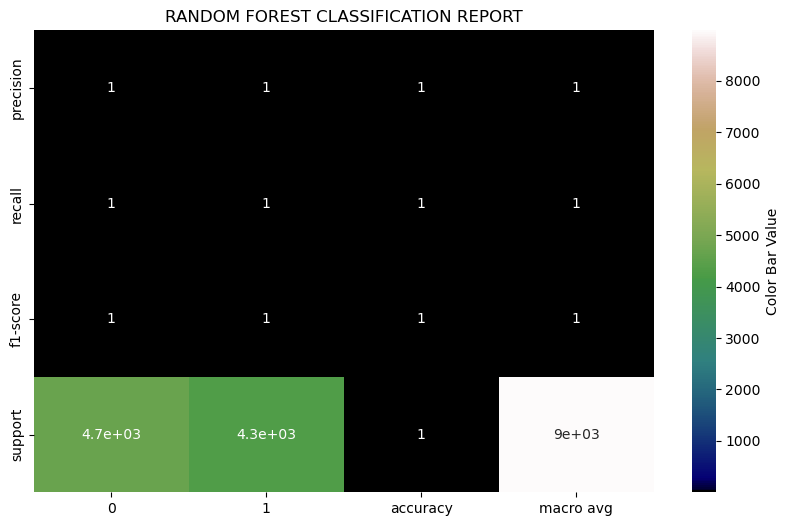

In [100]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_rf.iloc[:-1, :].T, annot=True, cmap='gist_earth', cbar_kws={'label':'Color Bar Value'})
plt.title('RANDOM FOREST CLASSIFICATION REPORT')
plt.show()

In [49]:
print(confusion_matrix(pred_lr, y_test))

[[4642   24]
 [  54 4260]]


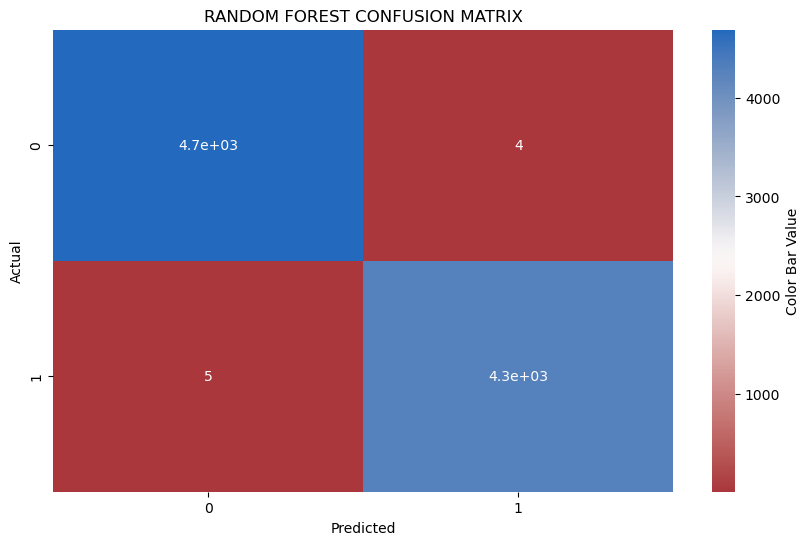

In [80]:
cmr = confusion_matrix(y_test, pred_rf)
plt.figure(figsize = (10,6))
sns.heatmap(cmr, cmap = 'vlag_r', annot = True, cbar_kws={'label':'Color Bar Value'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RANDOM FOREST CONFUSION MATRIX')
plt.show()

In [113]:
def output_label(n):
    if n == 0:
        return 'The news is fake'
    elif n == 1:
        return 'This news is true'
   
    
def news_detector(news):
    texting_news = {'text':[news]}
    new_def_test = pd.DataFrame(texting_news)
    new_def_test['text'] = new_def_test['text'].apply(preprocess_text)
    X_test = new_def_test['text']
    new_Xv_test = vectorizer.transform(X_test)
    pred_lr = lr.predict(new_Xv_test)
    pred_rf = rf.predict(new_Xv_test)
    pred_sv = sv.predict(new_Xv_test)
    return print('\n\nlr prediction: {} \nrf prediction: {} \nsv prediction: {}'.format(output_label(pred_lr[0]),
                                                                                                        
                                                                                        output_label(pred_rf[0]),
                                                                                     output_label(pred_sv[0])))


In [106]:
news = str(input())
news_detector(news)


 BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against  Taliban insurgents, saying:  Our troops will fight to win .  U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an   extraordinary sacrifice of blood and treasure .  We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they 



lr prediction: This news is true 
rf prediction: This news is true 
sv prediction: This news is true


In [107]:
news = str(input())
fake_news_detector(news)


 Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, 



lr prediction: The news is fake 
rf prediction: The news is fake 
sv prediction: The news is fake


In [108]:
news = str(input())
fake_news_detector(news)


 SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years o



lr prediction: This news is true 
rf prediction: This news is true 
sv prediction: This news is true
